<b>The following outcomes would ideally be expected from the following 4 weeks of internship:
<li>Build an AI algorithm that can classify the cancer type. 
<li>Decrease the amount of predictors while keeping the accuracy high.
<li>Identify the key predictors when a sample has been classified and report on these predictors through a graph, picture etc.
<li>The dataset must be utilised in a 60/40 Train/Test split.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [9]:
data = pd.read_csv("IX_CancerData_TB.csv")

In [11]:
data.head(3)

,Unnamed: 0,Type,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,...,ENSG00000009694.12,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
0,1,BRCA,0.017243,0.000000,1.557943,0.0,5.017788,6.132192,0.0,0.017186,...,0.007595,0.007793,0.0,0.055523,0.028739,10.243520,0.250405,0.0,0.613717,0.0
1,2,BRCA,0.000000,0.003233,2.697767,0.0,4.903484,9.750896,0.0,0.014376,...,0.030789,0.063184,0.0,0.000000,0.000000,16.606613,0.082307,0.0,0.170743,0.0
2,3,BRCA,0.000000,0.000000,5.831249,0.0,3.054890,17.232771,0.0,0.006936,...,0.144831,0.000000,0.0,0.058823,0.121788,20.069360,0.530575,0.0,0.305974,0.0


In [13]:
data.dtypes

Unnamed: 0              int64
Type                   object
ENSG00000242268.2     float64
ENSG00000270112.3     float64
ENSG00000167578.15    float64
                       ...   
ENSG00000105063.17    float64
ENSG00000231119.2     float64
ENSG00000280861.1     float64
ENSG00000123685.7     float64
ENSG00000181518.3     float64
Length: 58442, dtype: object

In [15]:
data.isna().sum()

Unnamed: 0            0
Type                  0
ENSG00000242268.2     0
ENSG00000270112.3     0
ENSG00000167578.15    0
                     ..
ENSG00000105063.17    0
ENSG00000231119.2     0
ENSG00000280861.1     0
ENSG00000123685.7     0
ENSG00000181518.3     0
Length: 58442, dtype: int64

## Data Cleaning

In [17]:
#count the number of zeros in each column
#calculate the percentage
#keep track of the columns that have less than 40% zeros

cols = []

for col in data:
    c = data[col]
    z = (c == 0).sum()
    zeros = z / 2109 * 100
    if zeros < 40:
        cols += [col]

In [19]:
data = data.loc[:, cols]

<b>Cancer Types:
<li>BRCA: Breast Invasive Carcinoma
<li>BLCA: Bladder Urothelial Carcinoma
<li>HNSC: Head and Neck Squamous Cell Carcinoma
<li>KIRC: Kidney Renal Clear Cell Carcinoma
<li>KIRP: Kidney Renal Papillary Cell Carcinoma
<li>COAD: Colon Adenocarcinoma
<li>LIHC: Liver Hepatocellular Carcinoma
<li>LUAD: Lung Adenocarcinoma
<li>LUSC: Lung Squamous Cell Carcinoma	
<li>OV: Ovarian Serous Cystadenocarcinoma
<li>PRAD: Prostate Adenocarcinoma

In [21]:
#divide dataframe according to cancer type
BRCA = data.loc[data.Type=="BRCA", cols]
BLCA = data.loc[data.Type=="BLCA", cols]
HNSC = data.loc[data.Type=="HNSC", cols]
KIRC = data.loc[data.Type=="KIRC", cols]
KIRP = data.loc[data.Type=="KIRP", cols]
COAD = data.loc[data.Type=="COAD", cols]
LIHC = data.loc[data.Type=="LIHC", cols]
LUAD = data.loc[data.Type=="LUAD", cols]
LUSC = data.loc[data.Type=="LUSC", cols]
OV = data.loc[data.Type=="OV", cols]
PRAD = data.loc[data.Type=="PRAD", cols]

## Dimension reduction

In [23]:
data.describe()

,Unnamed: 0,ENSG00000167578.15,ENSG00000078237.5,ENSG00000146083.10,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,ENSG00000134108.11,ENSG00000263089.1,ENSG00000172137.17,...,ENSG00000213782.6,ENSG00000146707.13,ENSG00000135094.9,ENSG00000231612.1,ENSG00000009694.12,ENSG00000186115.11,ENSG00000267117.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000123685.7
count,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,...,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000
mean,1055.000000,3.635264,4.182546,13.169315,0.200361,191.930469,0.167644,27.762056,0.082159,3.047173,...,0.457871,4.370198,17.802599,0.095321,0.743316,3.191828,0.212433,15.504560,0.449303,0.863953
std,608.960179,2.350044,4.770590,7.283324,0.554549,160.992823,0.525611,12.383856,0.298873,11.141904,...,0.394194,3.104703,96.470054,0.215028,1.982985,12.021718,0.295863,7.051332,1.092886,1.015627
min,1.000000,0.435606,0.173593,0.531652,0.000000,18.880745,0.000000,4.958876,0.000000,0.000000,...,0.000000,0.236996,0.051239,0.000000,0.000000,0.000000,0.000000,0.898690,0.000000,0.014896
25%,528.000000,2.182142,2.328920,8.434296,0.018071,109.160270,0.027155,19.503659,0.012565,0.137321,...,0.205244,2.083603,1.126628,0.000000,0.016733,0.005259,0.047337,10.842311,0.091179,0.304265
50%,1055.000000,3.058661,3.590556,11.763797,0.077476,156.024028,0.068786,25.468607,0.032287,0.462232,...,0.351039,3.668490,2.489735,0.043291,0.095683,0.032998,0.122367,14.466283,0.203892,0.550797
75%,1582.000000,4.420560,5.146582,16.141889,0.196730,224.153528,0.142558,33.587505,0.069338,1.859535,...,0.589566,5.754199,4.972762,0.110292,0.640128,0.334817,0.256152,18.971165,0.414331,1.041430
max,2109.000000,38.696938,187.851601,61.809897,12.721510,3887.038686,9.731571,124.233477,6.089799,259.338758,...,4.274700,33.688644,1848.813610,3.547062,29.166522,158.911979,3.552154,94.792173,19.762116,13.888980


In [24]:
# Source: https://github.com/greenelab/tybalt/blob/master/process_data.ipynb
num_mad_genes = 5000

In [25]:
# dimension reduction for entire data frame
mad_genes = data.mad(axis=0).sort_values(ascending=False)
top_mad_genes = mad_genes.iloc[0:num_mad_genes, ].index
reduced_df = data.loc[:, top_mad_genes]

# dimension reducation for BRCA data 
mad_genes_BRCA = BRCA.mad(axis=0).sort_values(ascending=False)
top_mad_genes_BRCA = mad_genes_BRCA.iloc[0:num_mad_genes, ].index
reduced_BRCA = BRCA.loc[:, top_mad_genes_BRCA]

# dimension reducation for BLCA data 
mad_genes_BLCA = BLCA.mad(axis=0).sort_values(ascending=False)
top_mad_genes_BLCA = mad_genes_BLCA.iloc[0:num_mad_genes, ].index
reduced_BLCA = BLCA.loc[:, top_mad_genes_BLCA]

# dimension reducation for HNSC data 
mad_genes_HNSC = HNSC.mad(axis=0).sort_values(ascending=False)
top_mad_genes_HNSC = mad_genes_HNSC.iloc[0:num_mad_genes, ].index
reduced_HNSC = HNSC.loc[:, top_mad_genes_HNSC]

# dimension reducation for KIRC data 
mad_genes_KIRC = KIRC.mad(axis=0).sort_values(ascending=False)
top_mad_genes_KIRC = mad_genes_KIRC.iloc[0:num_mad_genes, ].index
reduced_KIRC = KIRC.loc[:, top_mad_genes_KIRC]

# dimension reducation for KIRP data 
mad_genes_KIRP = KIRP.mad(axis=0).sort_values(ascending=False)
top_mad_genes_KIRP = mad_genes_KIRP.iloc[0:num_mad_genes, ].index
reduced_KIRP = KIRP.loc[:, top_mad_genes_KIRP]

# dimension reducation for COAD data 
mad_genes_COAD = COAD.mad(axis=0).sort_values(ascending=False)
top_mad_genes_COAD = mad_genes_COAD.iloc[0:num_mad_genes, ].index
reduced_COAD = COAD.loc[:, top_mad_genes_COAD]

# dimension reducation for LIHC data 
mad_genes_LIHC = LIHC.mad(axis=0).sort_values(ascending=False)
top_mad_genes_LIHC = mad_genes_LIHC.iloc[0:num_mad_genes, ].index
reduced_LIHC = LIHC.loc[:, top_mad_genes_LIHC]

# dimension reducation for LUAD data 
mad_genes_LUAD = LUAD.mad(axis=0).sort_values(ascending=False)
top_mad_genes_LUAD = mad_genes_LUAD.iloc[0:num_mad_genes, ].index
reduced_LUAD = LUAD.loc[:, top_mad_genes_LUAD]

# dimension reducation for LUSC data 
mad_genes_LUSC = LUSC.mad(axis=0).sort_values(ascending=False)
top_mad_genes_LUSC = mad_genes_LUSC.iloc[0:num_mad_genes, ].index
reduced_LUSC = LUSC.loc[:, top_mad_genes_LUSC]

# dimension reducation for OV data 
mad_genes_OV = OV.mad(axis=0).sort_values(ascending=False)
top_mad_genes_OV = mad_genes_OV.iloc[0:num_mad_genes, ].index
reduced_OV = OV.loc[:, top_mad_genes_OV]

# dimension reducation for PRAD data 
mad_genes_PRAD = PRAD.mad(axis=0).sort_values(ascending=False)
top_mad_genes_PRAD = mad_genes_PRAD.iloc[0:num_mad_genes, ].index
reduced_PRAD = PRAD.loc[:, top_mad_genes_PRAD]

## Scale 

In [26]:
data.head()

,Unnamed: 0,Type,ENSG00000167578.15,ENSG00000078237.5,ENSG00000146083.10,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,ENSG00000134108.11,ENSG00000263089.1,...,ENSG00000213782.6,ENSG00000146707.13,ENSG00000135094.9,ENSG00000231612.1,ENSG00000009694.12,ENSG00000186115.11,ENSG00000267117.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000123685.7
0,1,BRCA,1.557943,5.017788,6.132192,0.017186,66.914631,0.158791,27.166180,0.028598,...,0.155464,2.374871,1.706492,0.219110,0.007595,0.007793,0.055523,10.243520,0.250405,0.613717
1,2,BRCA,2.697767,4.903484,9.750896,0.014376,72.009991,0.085830,52.731004,0.046374,...,0.236340,6.542841,4.490928,0.111032,0.030789,0.063184,0.000000,16.606613,0.082307,0.170743
2,3,BRCA,5.831249,3.054890,17.232771,0.006936,89.093490,0.134583,36.967120,0.048476,...,0.514699,4.669626,1.095969,0.116066,0.144831,0.000000,0.058823,20.069360,0.530575,0.305974
3,4,BRCA,5.013642,3.972959,14.478933,0.007975,154.499392,0.051581,22.438673,0.061931,...,0.426097,1.951768,9.432912,0.059313,0.022615,0.000000,0.090179,18.965261,0.095264,1.558708
4,5,BRCA,3.739011,2.789155,15.336983,0.050073,143.640545,0.158165,37.671767,0.065109,...,0.632537,6.964534,3.164238,0.155890,0.040526,0.027722,0.276519,12.879618,0.125190,0.488011


In [43]:
scaler = StandardScaler().fit_transform(data.iloc[:, 2:])

In [44]:
scaled_df = pd.DataFrame(scaler, columns=data.columns[2:], index=data.index)

In [48]:
scaled_df.head()

,ENSG00000167578.15,ENSG00000078237.5,ENSG00000146083.10,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,ENSG00000134108.11,ENSG00000263089.1,ENSG00000172137.17,ENSG00000167700.7,...,ENSG00000213782.6,ENSG00000146707.13,ENSG00000135094.9,ENSG00000231612.1,ENSG00000009694.12,ENSG00000186115.11,ENSG00000267117.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000123685.7
0,-0.884160,0.175123,-0.966426,-0.330392,-0.776715,-0.016848,-0.048129,-0.179254,-0.176102,-0.756088,...,-0.767335,-0.642831,-0.166890,0.575825,-0.371105,-0.264920,-0.530472,-0.746283,-0.182037,-0.246444
1,-0.399022,0.151157,-0.469460,-0.335459,-0.745058,-0.155691,2.016728,-0.119764,-0.088668,-0.258489,...,-0.562117,0.699957,-0.138020,0.073085,-0.359406,-0.260311,-0.718180,0.156327,-0.335884,-0.682706
2,0.934666,-0.236433,0.558045,-0.348879,-0.638919,-0.062915,0.743488,-0.112727,-0.246203,1.090180,...,0.144197,0.096466,-0.173221,0.096502,-0.301882,-0.265568,-0.519316,0.647521,0.074382,-0.549525
3,0.586672,-0.043944,0.179853,-0.347005,-0.232557,-0.220868,-0.429967,-0.067698,-0.003816,0.416714,...,-0.080623,-0.779142,-0.086780,-0.167497,-0.363529,-0.265568,-0.413307,0.490903,-0.324026,0.684227
4,0.044157,-0.292149,0.297691,-0.271074,-0.300022,-0.018039,0.800402,-0.057063,-0.154171,-0.404883,...,0.443202,0.835813,-0.151776,0.281748,-0.354494,-0.263262,0.216659,-0.372350,-0.296636,-0.370246


In [47]:
scaler.mean()

8.294182423531856e-19

## EDA

In [89]:
reduced_BRCA.head()

,ENSG00000210082.2,ENSG00000198712.1,ENSG00000198938.2,ENSG00000198886.2,ENSG00000198804.2,ENSG00000202198.1,ENSG00000198899.2,ENSG00000198888.2,ENSG00000198840.2,ENSG00000198763.3,...,ENSG00000107954.9,ENSG00000274267.1,ENSG00000076826.8,ENSG00000165475.12,ENSG00000204217.11,ENSG00000019102.10,ENSG00000169122.10,ENSG00000156858.10,ENSG00000223501.7,ENSG00000058063.14
0,4935.502794,5715.880814,5074.278246,5729.058331,5004.261682,9.209806,4306.842875,2644.409387,2313.986776,2832.470551,...,0.032081,1.578749,9.180171,4.471170,16.972886,0.085494,2.925085,6.080145,15.752725,10.814256
1,3892.533127,4039.803827,6194.761496,3440.555180,6160.714848,13.944762,2478.191087,2404.784625,2143.519988,2554.411329,...,0.870375,0.120758,12.166256,18.231312,24.813592,2.865125,2.921854,9.879126,23.234044,13.710330
2,2128.511701,4166.421909,4332.811846,4351.111406,5240.735453,4.545521,2877.755003,874.254489,1933.865667,1382.033304,...,21.679226,0.000000,14.440122,23.471954,10.382435,4.546890,6.512757,13.064496,23.544333,0.682653
3,5453.793771,15194.472213,11001.114329,9390.479701,10281.684334,3.804693,9152.916688,9312.545014,7389.151377,9441.549791,...,1.477678,0.290285,13.513543,8.324457,7.614070,0.518405,5.111593,39.247041,22.679753,1.517936
4,2819.806095,3297.681653,4798.912802,4577.812422,3537.835993,6.999857,3783.386260,3628.698101,3885.520011,2508.446424,...,0.210692,0.042386,14.012064,10.360395,8.816545,6.070480,8.951763,17.822365,19.115180,3.411774


<AxesSubplot:xlabel='ENSG00000078237.5', ylabel='Type'>

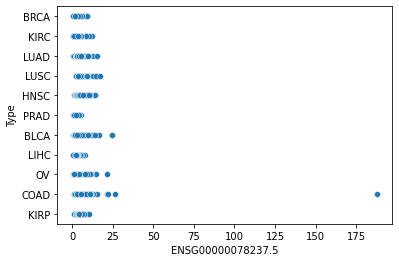

In [91]:
sns.scatterplot(x = data["ENSG00000078237.5"], y = data["Type"])

<AxesSubplot:>

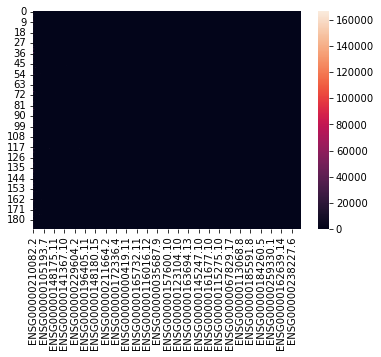

In [95]:
sns.heatmap(reduced_BRCA)

In [ ]:
sns.histplot(reduced_BRCA)